# Import necessary libaries

In [1]:
!pip install kneed

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.cluster import KElbowVisualizer

import os

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing Original Data

## Reading original data

In [4]:
data_folder = '/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/'

original_data = 'no2_stations.csv'

data.drop('Unnamed: 18', axis='columns', inplace = True)
data

,time,lat,lon,NO2,name,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,ndvi,pplt_dens,road_dens,omi_no2
0,1/1/2019,21.0491,105.8831,0.000000,NVC,391.864014,102794.0,66.589302,11.087100,4.69022,5.980500,5.019875,4.711437,4.758125,0.134988,27.722601,1828.880005,0.000000
1,1/2/2019,21.0491,105.8831,0.000000,NVC,558.942993,102699.0,65.773903,12.090000,3.59040,2.657062,4.092187,8.700875,7.603187,0.000000,27.722601,1828.880005,0.000000
2,1/3/2019,21.0491,105.8831,41.310400,NVC,326.197998,102453.0,69.259697,13.018900,2.96978,5.755687,6.602938,8.837000,9.167312,0.000000,27.722601,1828.880005,0.000000
3,1/4/2019,21.0491,105.8831,39.379204,NVC,197.524994,102181.0,78.663696,15.516100,2.77573,8.956062,10.830875,13.301438,13.640625,0.000000,27.722601,1828.880005,0.000000
4,1/5/2019,21.0491,105.8831,39.901879,NVC,287.825012,102072.0,75.866699,17.658199,3.12869,12.547000,12.891687,15.638813,12.034750,0.000000,27.722601,1828.880005,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,454.903015,102068.0,43.484299,16.768499,3.66034,7.437375,5.100375,3.930875,6.508750,0.000000,442.738007,4993.080078,0.000000
5471,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,400.079010,101755.0,49.469700,19.499901,2.41066,13.452063,12.091188,5.180625,9.206437,0.000000,442.738007,4993.080078,0.000000
5472,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,326.407013,101510.0,66.391800,22.555500,1.45771,17.722375,16.551500,13.518500,18.223813,0.000000,442.738007,4993.080078,0.000089
5473,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,468.182007,101796.0,64.951401,23.062800,4.10253,16.676687,14.273500,16.221062,18.177937,0.000000,442.738007,4993.080078,0.000000


## Data Preprocessing

### Define Functions for Preprocessing

In [6]:
labelencoder = LabelEncoder()

# We encode time into string format for better usage
def encode_time(time):
    try:
        split = time.split(sep='/', maxsplit=3)
        # return split[1] + split[2]
        return split[0]
    except:
        return

# Scaling numerical data to range(0,1)
def scale_numeric(df):
  scaler = MinMaxScaler()

  numeric_cols = ["pblh",	"press", "rh",	"tmp",	"wspd",	"dpt_00",	"dpt_06",	"dpt_12",	"dpt_18",	"pplt_dens",	"road_dens"]

  df[[col for col in numeric_cols]] = scaler.fit_transform(df[[col for col in numeric_cols]])
  
  return df

def preprocess(df, scale=False):  
    # drop_cols = ['time', 'name', 'omi_no2', 'ndvi', 'Unnamed: 18']
    drop_cols = ['Unnamed: 18', 'omi_no2']
    # drop na column
    for col in drop_cols:
      if col in df:
        df.drop(col, axis='columns', inplace=True)

    df.dropna(axis='rows',inplace=True)
    
    # df['month'] == df['time'].apply(encode_time)

    if scale != False:
      df = scale_numeric(df)

    return df

### Applying Preprocessing to data

In [7]:
# Setting scale to True if you want to generate a scaled data
preprocess(data, scale=False)

# data['month'] = data['time'].apply(encode_time)
data

,time,lat,lon,NO2,name,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,ndvi,pplt_dens,road_dens
0,1/1/2019,21.0491,105.8831,0.000000,NVC,391.864014,102794.0,66.589302,11.087100,4.69022,5.980500,5.019875,4.711437,4.758125,0.134988,27.722601,1828.880005
1,1/2/2019,21.0491,105.8831,0.000000,NVC,558.942993,102699.0,65.773903,12.090000,3.59040,2.657062,4.092187,8.700875,7.603187,0.000000,27.722601,1828.880005
2,1/3/2019,21.0491,105.8831,41.310400,NVC,326.197998,102453.0,69.259697,13.018900,2.96978,5.755687,6.602938,8.837000,9.167312,0.000000,27.722601,1828.880005
3,1/4/2019,21.0491,105.8831,39.379204,NVC,197.524994,102181.0,78.663696,15.516100,2.77573,8.956062,10.830875,13.301438,13.640625,0.000000,27.722601,1828.880005
4,1/5/2019,21.0491,105.8831,39.901879,NVC,287.825012,102072.0,75.866699,17.658199,3.12869,12.547000,12.891687,15.638813,12.034750,0.000000,27.722601,1828.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,12/27/2019,21.0197,105.8147,18.995833,ThanhCong,454.903015,102068.0,43.484299,16.768499,3.66034,7.437375,5.100375,3.930875,6.508750,0.000000,442.738007,4993.080078
5471,12/28/2019,21.0197,105.8147,23.241667,ThanhCong,400.079010,101755.0,49.469700,19.499901,2.41066,13.452063,12.091188,5.180625,9.206437,0.000000,442.738007,4993.080078
5472,12/29/2019,21.0197,105.8147,16.816667,ThanhCong,326.407013,101510.0,66.391800,22.555500,1.45771,17.722375,16.551500,13.518500,18.223813,0.000000,442.738007,4993.080078
5473,12/30/2019,21.0197,105.8147,21.595833,ThanhCong,468.182007,101796.0,64.951401,23.062800,4.10253,16.676687,14.273500,16.221062,18.177937,0.000000,442.738007,4993.080078


# Kmeans Clustering

In [ ]:
# data_version = 'data_processed_scaled.csv'

# data = pd.read_csv(os.path.join(data_folder, data_version))
# data

In [ ]:
X = data.drop('NO2', axis='columns')
X = data['NO2', 'time']

cluster_range = range(2, 15)
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

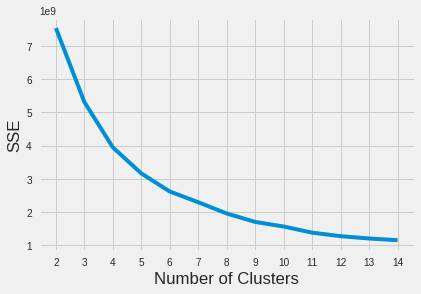

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(cluster_range, sse)
 plt.xticks(cluster_range)
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [ ]:
kl = KneeLocator(cluster_range, sse, curve="convex", direction="decreasing")

best_clusters = kl.elbow
best_clusters

6

In [ ]:
type(X)
X_arr = X.to_numpy()

In [ ]:
best_kmeans = KMeans(n_clusters=best_clusters, **kmeans_kwargs)
best_kmeans.fit(X_arr)
labels = best_kmeans.predict(X_arr)

# label of cluster centroids for all points
labels

array([4, 4, 4, ..., 5, 5, 5], dtype=int32)

In [ ]:
X

,lat,lon,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,pplt_dens,road_dens
0,21.0491,105.8831,391.864014,102794.0,66.589302,11.087100,4.69022,5.980500,5.019875,4.711437,4.758125,27.722601,1828.880005
1,21.0491,105.8831,558.942993,102699.0,65.773903,12.090000,3.59040,2.657062,4.092187,8.700875,7.603187,27.722601,1828.880005
2,21.0491,105.8831,326.197998,102453.0,69.259697,13.018900,2.96978,5.755687,6.602938,8.837000,9.167312,27.722601,1828.880005
3,21.0491,105.8831,197.524994,102181.0,78.663696,15.516100,2.77573,8.956062,10.830875,13.301438,13.640625,27.722601,1828.880005
4,21.0491,105.8831,287.825012,102072.0,75.866699,17.658199,3.12869,12.547000,12.891687,15.638813,12.034750,27.722601,1828.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,21.0197,105.8147,454.903015,102068.0,43.484299,16.768499,3.66034,7.437375,5.100375,3.930875,6.508750,442.738007,4993.080078
5471,21.0197,105.8147,400.079010,101755.0,49.469700,19.499901,2.41066,13.452063,12.091188,5.180625,9.206437,442.738007,4993.080078
5472,21.0197,105.8147,326.407013,101510.0,66.391800,22.555500,1.45771,17.722375,16.551500,13.518500,18.223813,442.738007,4993.080078
5473,21.0197,105.8147,468.182007,101796.0,64.951401,23.062800,4.10253,16.676687,14.273500,16.221062,18.177937,442.738007,4993.080078


In [ ]:
centroids = best_kmeans.cluster_centers_
centroids

array([[2.10234451e+01, 1.05836606e+02, 5.71862716e+02, 1.00094336e+05,
        7.65178052e+01, 2.92033999e+01, 4.36689221e+00, 2.43413734e+01,
        2.37592636e+01, 2.40050249e+01, 2.41647181e+01, 2.30776211e+02,
        5.30063662e+03],
       [2.10686577e+01, 1.05907453e+02, 5.29748187e+02, 1.00102690e+05,
        7.79432791e+01, 2.86857459e+01, 4.36134798e+00, 2.40502113e+01,
        2.36135443e+01, 2.37266056e+01, 2.38542049e+01, 4.19400156e+01,
        1.42176607e+03],
       [1.90706201e+01, 1.06688670e+02, 4.15401175e+02, 1.01474666e+05,
        7.54628461e+01, 2.24355250e+01, 3.50052499e+00, 1.73417985e+01,
        1.72663508e+01, 1.72581791e+01, 1.73808903e+01, 1.93285697e+02,
        3.79628280e+03],
       [1.86970800e+01, 1.06831761e+02, 4.40970722e+02, 1.00209865e+05,
        7.83647579e+01, 2.84683991e+01, 3.90549926e+00, 2.40520468e+01,
        2.35585892e+01, 2.36701251e+01, 2.39096056e+01, 1.92365373e+02,
        3.58629955e+03],
       [2.10636207e+01, 1.05923012e+

In [ ]:
features_dict = {k: v for k, v in enumerate(X.columns)}

# function to return key for any value
def get_key(val):
	for key, value in features_dict.items():
		if val == value:
			return key

	return "key doesn't exist"

features_dict
# # get_key('road_dens')
# X_arr[:, 12]

{0: 'lat',
 1: 'lon',
 2: 'pblh',
 3: 'press',
 4: 'rh',
 5: 'tmp',
 6: 'wspd',
 7: 'dpt_00',
 8: 'dpt_06',
 9: 'dpt_12',
 10: 'dpt_18',
 11: 'pplt_dens',
 12: 'road_dens'}

Text(0, 0.5, 'press')

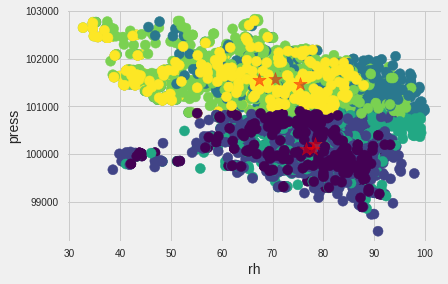

In [ ]:
x = 'rh'
y = 'press'

plt.scatter(X_arr[:, get_key(x)], X_arr[:, get_key(y)], c=labels, s=100, cmap='viridis')
plt.scatter(centroids[:, get_key(x)], centroids[:, get_key(y)], marker = '*', c='red', s=200, alpha=0.5);

plt.xlabel(x, fontsize = 14)
plt.ylabel(y, fontsize = 14)

Text(0, 0.5, 'tmp')

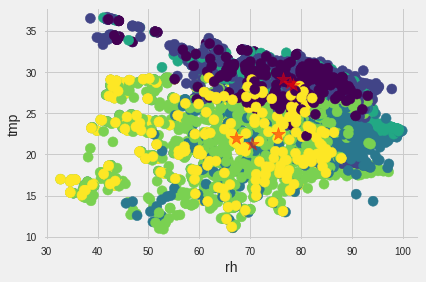

In [ ]:
x = 'rh'
y = 'tmp'

plt.scatter(X_arr[:, get_key(x)], X_arr[:, get_key(y)], c=labels, s=100, cmap='viridis')
plt.scatter(centroids[:, get_key(x)], centroids[:, get_key(y)], marker = '*', c='red', s=200, alpha=0.5);

plt.xlabel(x, fontsize = 14)
plt.ylabel(y, fontsize = 14)

## Adding cluster column

In [ ]:
data['cluster'] = best_kmeans.labels_
data

,lat,lon,NO2,pblh,press,rh,tmp,wspd,dpt_00,dpt_06,dpt_12,dpt_18,pplt_dens,road_dens,cluster
0,21.0491,105.8831,0.000000,391.864014,102794.0,66.589302,11.087100,4.69022,5.980500,5.019875,4.711437,4.758125,27.722601,1828.880005,4
1,21.0491,105.8831,0.000000,558.942993,102699.0,65.773903,12.090000,3.59040,2.657062,4.092187,8.700875,7.603187,27.722601,1828.880005,4
2,21.0491,105.8831,41.310400,326.197998,102453.0,69.259697,13.018900,2.96978,5.755687,6.602938,8.837000,9.167312,27.722601,1828.880005,4
3,21.0491,105.8831,39.379204,197.524994,102181.0,78.663696,15.516100,2.77573,8.956062,10.830875,13.301438,13.640625,27.722601,1828.880005,4
4,21.0491,105.8831,39.901879,287.825012,102072.0,75.866699,17.658199,3.12869,12.547000,12.891687,15.638813,12.034750,27.722601,1828.880005,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,21.0197,105.8147,18.995833,454.903015,102068.0,43.484299,16.768499,3.66034,7.437375,5.100375,3.930875,6.508750,442.738007,4993.080078,5
5471,21.0197,105.8147,23.241667,400.079010,101755.0,49.469700,19.499901,2.41066,13.452063,12.091188,5.180625,9.206437,442.738007,4993.080078,5
5472,21.0197,105.8147,16.816667,326.407013,101510.0,66.391800,22.555500,1.45771,17.722375,16.551500,13.518500,18.223813,442.738007,4993.080078,5
5473,21.0197,105.8147,21.595833,468.182007,101796.0,64.951401,23.062800,4.10253,16.676687,14.273500,16.221062,18.177937,442.738007,4993.080078,5


In [ ]:
# data[data.road_dens == 0.20432150338890406]
# data[(data.pplt_dens == 0) & (data.road_dens == 0.020828745736930082)]
# data[data.cluster == 2].iloc[1, -2]

data['cluster'].unique()

array([4, 1, 2, 3, 0, 5], dtype=int32)

In [ ]:
# Saving data without scale
# data.to_csv('/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/data_processed_withoutscale.csv', index=False)

# Saving data with scale
# data.to_csv('/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/data_processed_withscale.csv', index=False)


In [ ]:
# data.to_csv('/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/data_dropped_scaled.csv', index=False)

## Adding center column

In [ ]:
# data.to_csv('/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/data_processed.csv', index=False)
# df = pd.read_csv('/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/data_processed.csv')
# # train_df.to_pickle('/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/train_withcenter.pkl')

In [ ]:
centroids

array([[2.10234451e+01, 1.05836606e+02, 5.71862716e+02, 1.00094336e+05,
        7.65178052e+01, 2.92033999e+01, 4.36689221e+00, 2.43413734e+01,
        2.37592636e+01, 2.40050249e+01, 2.41647181e+01, 2.30776211e+02,
        5.30063662e+03],
       [2.10686577e+01, 1.05907453e+02, 5.29748187e+02, 1.00102690e+05,
        7.79432791e+01, 2.86857459e+01, 4.36134798e+00, 2.40502113e+01,
        2.36135443e+01, 2.37266056e+01, 2.38542049e+01, 4.19400156e+01,
        1.42176607e+03],
       [1.90706201e+01, 1.06688670e+02, 4.15401175e+02, 1.01474666e+05,
        7.54628461e+01, 2.24355250e+01, 3.50052499e+00, 1.73417985e+01,
        1.72663508e+01, 1.72581791e+01, 1.73808903e+01, 1.93285697e+02,
        3.79628280e+03],
       [1.86970800e+01, 1.06831761e+02, 4.40970722e+02, 1.00209865e+05,
        7.83647579e+01, 2.84683991e+01, 3.90549926e+00, 2.40520468e+01,
        2.35585892e+01, 2.36701251e+01, 2.39096056e+01, 1.92365373e+02,
        3.58629955e+03],
       [2.10636207e+01, 1.05923012e+

In [ ]:
cluster2center = {k: v for k, v in enumerate(centroids)}
cluster2center.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [ ]:
# cluster_center = pd.DataFrame(centroids)
# cluster_center['cluter'] = cluster2center.keys()
# cluster_center

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluter
0,21.023445,105.836606,571.862716,100094.336010,76.517805,29.203400,4.366892,24.341373,23.759264,24.005025,24.164718,230.776211,5300.636624,0
1,21.068658,105.907453,529.748187,100102.689847,77.943279,28.685746,4.361348,24.050211,23.613544,23.726606,23.854205,41.940016,1421.766069,1
2,19.070620,106.688670,415.401175,101474.666320,75.462846,22.435525,3.500525,17.341798,17.266351,17.258179,17.380890,193.285697,3796.282797,2
3,18.697080,106.831761,440.970722,100209.864614,78.364758,28.468399,3.905499,24.052047,23.558589,23.670125,23.909606,192.365373,3586.299547,3
4,21.063621,105.923012,416.315372,101564.212009,70.444734,21.255696,3.551841,15.017745,14.845207,14.833051,15.020218,41.821127,1415.600110,4
5,21.017943,105.834946,443.636194,101547.889439,67.275342,21.938710,3.499242,15.362892,15.066535,15.305642,15.717724,231.949990,5613.884140,5


In [ ]:
# cluster_center.to_csv('/content/drive/MyDrive/STUDYING/HK2 2020-2021/Modern Problems in Technology/cluster_center_nonscale_data.csv')